At step: 0
At step: 10
At step: 20
At step: 30
At step: 40
At step: 50
At step: 60
At step: 70
At step: 80
At step: 90
At step: 100
At step: 110
At step: 120
At step: 130
At step: 140
At step: 150
At step: 160
At step: 170
At step: 180
At step: 190
At step: 200
At step: 210
At step: 220
At step: 230
[x,y]= [1.0016746625052915, 1.0486471819458436]
Converged in 231 step(s)


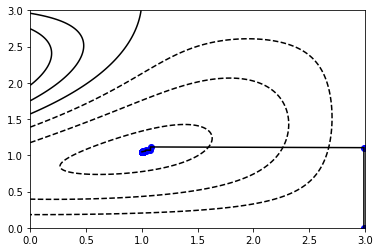

In [7]:
#EXACT LINE SEARCH


from scipy.misc import derivative
import matplotlib.pyplot as plt
import numpy as np 
import math 

def obfun(x1, x2):
    return(-((3*x1-x1**2)/2)*np.sin(x2)-((3-x1)**2/4)*np.sin(x2)*np.cos(x2))

def pd(fun, var=0, val=[]):
    arg = val[:]
    def wrap(x):
        arg[var] = x
        return fun(*arg)
    return(derivative(wrap, val[var], dx = 1e-1))

def funbi(alpha,vals,par): 
    return(obfun(vals[0]+alpha*par[0],vals[1]+alpha*par[1]))

def exactlinesearch(vals,par): 
    d=math.inf
    alpha=0.1
    while abs(d)>0.0001:
        d=-pd(funbi,0,[alpha,vals,par])
        al=0.1
        alpha=alpha+al*d
    return(alpha)

def gradient(inis):
    step=0
    d=[math.inf,math.inf] 
    X1=[]
    X2=[]
    while abs(d[0])>0.000001 or abs(d[1])>0.000001:
        if (step % 10)==0:
            print('At step:', step)
        X1.append(inis[0])
        X2.append(inis[1])
        d=[-pd(obfun,0,inis),-pd(obfun,1,inis)]
        alpha=exactlinesearch(inis,d)
        inis[0],inis[1]=inis[0]+alpha*d[0],inis[1]+alpha*d[1]
        step+=1

    print("[x,y]=", inis)
    print("Converged in %d step(s)" % step)
    return(X1,X2)



X1,X2=gradient([2.99,0])
# print(D)

x = np.linspace(0, 3, 1000)
y = np.linspace(0, 3, 1000)

X, Y = np.meshgrid(x, y)
Z = obfun(X, Y)
plt.contour(X, Y, Z, colors='black')

plt.plot(X1,X2,'bo',X1,X2,"k")
plt.show()

At step: 0
At step: 10
At step: 20
At step: 30
At step: 40
At step: 50
At step: 60
At step: 70
At step: 80
At step: 90
At step: 100
At step: 110
At step: 120
At step: 130
At step: 140
At step: 150
At step: 160
At step: 170
At step: 180
At step: 190
At step: 200
At step: 210
At step: 220
At step: 230
At step: 240
At step: 250
At step: 260
At step: 270
At step: 280
At step: 290
At step: 300
At step: 310
At step: 320
At step: 330
At step: 340
At step: 350
[x,y]= [1.0016745735256598, 1.0486471515530362]
Converged in 354 step(s)


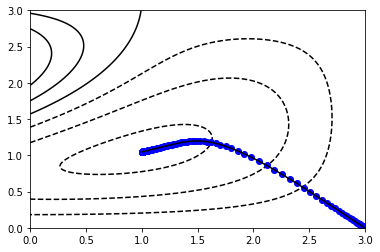

In [2]:
#NO LINE SEARCH


from scipy.misc import derivative
import matplotlib.pyplot as plt
import numpy as np 
import math 

def obfun(x1, x2):
    return(-((3*x1-x1**2)/2)*np.sin(x2)-((3-x1)**2/4)*np.sin(x2)*np.cos(x2))

def pd(fun, var=0, val=[]):
    arg = val[:]
    def wrap(x):
        arg[var] = x
        return fun(*arg)
    return(derivative(wrap, val[var], dx = 1e-1))

def gradient(inis):
    step=0
    d=[math.inf,math.inf] 
    X1=[]
    X2=[]
    while abs(d[0])>0.000001 or abs(d[1])>0.000001:
        if (step % 10)==0:
            print('At step:', step)
        X1.append(inis[0])
        X2.append(inis[1])
        d=[-pd(obfun,0,inis),-pd(obfun,1,inis)]
        alpha=0.1
        inis[0],inis[1]=inis[0]+alpha*d[0],inis[1]+alpha*d[1]
        step+=1
    print("[x,y]=", inis)
    print("Converged in %d step(s)" % step)
    return(X1,X2)



X1,X2=gradient([2.99,0])
x = np.linspace(0, 3, 1000)
y = np.linspace(0, 3, 1000)

X, Y = np.meshgrid(x, y)
Z = obfun(X, Y)
plt.contour(X, Y, Z, colors='black')

plt.plot(X1,X2,'bo',X1,X2,"k")
plt.show()

In [5]:
#BISECTION LINE SEARCH

from scipy.misc import derivative
import matplotlib.pyplot as plt
import numpy as np 
import math 

def obfun(x1, x2):
    return(-((3*x1-x1**2)/2)*np.sin(x2)-((3-x1)**2/4)*np.sin(x2)*np.cos(x2))

def pd(fun, var=0, val=[]):
    arg = val[:]
    def wrap(x):
        arg[var] = x
        return fun(*arg)
    return(derivative(wrap, val[var], dx = 1e-1))

def funbi(alpha,vals,par): 
    return(obfun(vals[0]+alpha*par[0],vals[1]+alpha*par[1]))

def bisection(vals,par): 
#     der=math.inf
    alpha2=0
    alpha1=1
    while pd(funbi,0,[alpha1,vals,par])<=0:
        alpha1=2*alpha1
    for _ in range(1000):
        alpha=1/2*(alpha1+alpha2)
        der=pd(funbi,0,[alpha,vals,par])
        if der>0:
            alpha1=alpha
        if der<0: 
            alpha2=alpha
    return(alpha)

def gradient(inis):
    step=0
    d=[math.inf,math.inf] 
    X1=[]
    X2=[]
    while abs(d[0])>0.000001 or abs(d[1])>0.000001:
        if (step % 10)==0:
            print('At step:', step)
        X1.append(inis[0])
        X2.append(inis[1])
        d=[-pd(obfun,0,inis),-pd(obfun,1,inis)]
        alpha=bisection(inis,d)
        print(alpha)
        inis[0],inis[1]=inis[0]+alpha*d[0],inis[1]+alpha*d[1]
        step+=1
    print("[x,y]=", inis)
    print("Converged in %d step(s)" % step)
    return(X1,X2)



X1,X2=gradient([2.99,0])

x = np.linspace(0, 3, 1000)
y = np.linspace(0, 3, 1000)

X, Y = np.meshgrid(x, y)
Z = obfun(X, Y)
plt.contour(X, Y, Z, colors='black')

plt.plot(X1,X2,'bo',X1,X2,"k")
plt.show()

At step: 0
104.95862881171342
1.0008381190365778
0.6688436381751162
1.3012283913266884
0.45649153140077203
1.3468263870988721
0.4305322266740177
1.130002500167393
0.47228699046740985
0.7426876630270272
At step: 10
0.6703291549347341
0.4279588560311822
1.9967592171160504
0.2535836145534631
0.07963075101724826
0.03635178512195125
0.019674059585668147
0.01166929304599762
0.007306584506295621
0.004732411471195519
At step: 20
0.003132992922928679
0.0021043927408754826
0.0014273070264607668
0.0009744770359247923
0.0006683135870844126
0.0004597579827532172
0.0003169570118188858
0.0002188299549743533
0.0001512350863777101
0.00010459241457283497
At step: 30
7.237005047500134e-05
5.0091417506337166e-05
3.467896021902561e-05
2.4012289941310883e-05
1.662876456975937e-05
1.1516734957695007e-05
7.976021151989698e-06
5.524372681975365e-06
3.826629836112261e-06
2.650544047355652e-06
At step: 40
1.8356367945671082e-06
1.2712553143501282e-06
8.805654942989349e-07
6.098998710513115e-07
4.2282044887542725

9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
At step: 350
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
At step: 360
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
At step: 370
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
At step: 380
9.332636185032189e-302
9.332636185032189e-302
9.332636185032189e-302
9.332

KeyboardInterrupt: 

In [ ]:
(a)